In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.datasets import make_regression #Bibliothèque d'apprentissage automatique gratuite en Python
import pandas as pd                          #Bibliothèque pour manipuler et afficher la base
import matplotlib.pyplot as plt              #Bibliothèque pour visualiser la base
import seaborn as sns                        #Bibliothèque de visualisation de données construite sur matplotlib
import numpy as np                           #Bibliothèque destinée à manipuler des matrices ou tableaux
from sklearn.model_selection import train_test_split 
from lightgbm import LGBMRegressor

#### train_test_split : Fonction permettant de diviser les tableaux de données en deux sous-ensembles: pour les données d'entraînement et pour les données de test.
#### LightGBM, abréviation de Light Gradient Boosting Machine, est un framework d'amplification de gradient distribué gratuit et open source pour l'apprentissage automatique développé à l'origine par Microsoft. Il est basé sur des algorithmes d'arbre de décision et utilisé pour le classement, la classification et d'autres tâches d'apprentissage automatique.

In [4]:
X, y = make_regression(n_samples=1000,       
                n_features=1,
                n_informative=1,
                n_targets=1)
                
Xs = pd.DataFrame(X, columns = ['distance'])
ys = pd.DataFrame(y, columns = ['temps_de_livraison'])

Xs['distance'] = Xs['distance'].apply(lambda x: 10 + 2 * (x + np.random.normal(loc=1))  )
ys['temps_de_livraison'] = ys['temps_de_livraison'].apply(lambda x: 60 + 0.3* (x + np.random.normal(loc=1)) )

#### make_regression: Générer un problème de régression aléatoire 
#### DataFrame représente une table de données avec des lignes et des colonnes

In [5]:
df = Xs.merge(ys, left_index=True, right_index=True)

#### La fonction merge reconnaît que chaque DataFrame a une colonne "employé" et se joint automatiquement en utilisant cette colonne comme clé. Le résultat de la fusion est un nouveau DataFrame qui combine les informations des deux entrées.

In [6]:
df.describe()

,distance,temps_de_livraison
count,1000.000000,1000.000000
mean,11.986838,60.433311
std,2.830319,21.343923
min,2.743621,-13.133578
25%,10.103112,46.784105
50%,11.989952,61.172571
75%,13.911670,74.822931
max,23.608066,131.710105


In [7]:
train_df, test_df = train_test_split(df, test_size=0.10, shuffle=False)

####  Train/Test est une méthode pour mesurer la précision de votre modèle. Il s'appelle Train/Test car vous divisez l'ensemble de données en deux ensembles : un ensemble d'apprentissage et un ensemble de test. Vous testez le modèle à l'aide de l'ensemble de test. Former le modèle signifie créer le modèle, ici on prends 10% de notre base initial qui est 100 personnes!
#### La méthode shuffle() prend une séquence, comme une liste, et réorganise l'ordre des éléments. 
#### Remarque : Cette méthode modifie la liste d'origine, elle ne renvoie pas de nouvelle liste.

In [8]:
X_train, y_train = train_df[['distance']], train_df[['temps_de_livraison']]
X_test, y_test = test_df[['distance']], test_df[['temps_de_livraison']]

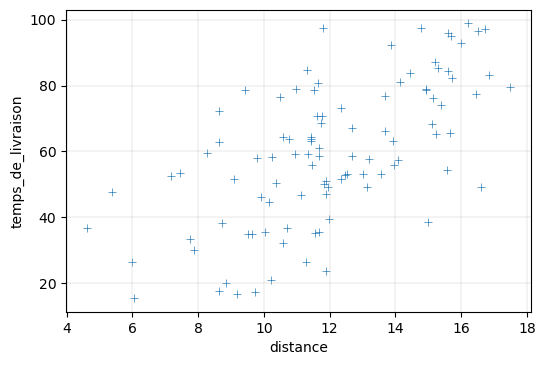

In [9]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
sns.scatterplot(data=test_df, x="distance", y="temps_de_livraison", marker='+')
plt.grid(linestyle='-', linewidth=0.2)

In [10]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

#### Les classificateurs d'apprentissage automatique peuvent être utilisés pour prédire. À partir de données d'exemple (mesures), l'algorithme peut prédire la classe à laquelle appartiennent les données.

#### LGBMRegressor peut également être importé pour un modèle de régression de lightgbm .

In [11]:
data = pd.DataFrame({'distance': X_test.reset_index()['distance'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'temps_de_livraison': y_test.reset_index()['temps_de_livraison']})

In [12]:
data.sample(2)

,distance,0.1,0.5,0.9,temps_de_livraison
73,13.942813,56.034801,75.169169,82.222106,55.757449
78,10.239390,35.111224,42.980721,71.657879,58.177668


#### sample () est une fonction intégrée du module aléatoire en Python qui renvoie une liste de longueur particulière d'éléments choisis dans la séquence, c'est-à-dire liste, tuple, chaîne ou ensemble.

In [13]:
melted_data = pd.melt(data, id_vars=['distance'])

#### La fonction melt () est utile pour masser un DataFrame dans un format où une ou plusieurs colonnes sont des variables d'identification, tandis que toutes les autres colonnes, considérées comme des variables mesurées, ne sont pas pivotées sur l'axe des lignes, ne laissant que deux colonnes non identifiantes, variable et valeur

In [14]:
melted_data

,distance,variable,value
0,13.028525,0.1,38.566709
1,5.372767,0.1,4.906025
2,7.878491,0.1,19.353018
3,5.979299,0.1,4.906025
4,9.181638,0.1,17.018660
...,...,...,...
395,11.894105,temps_de_livraison,47.149715
396,12.527755,temps_de_livraison,53.156304
397,12.467613,temps_de_livraison,52.884348
398,7.443458,temps_de_livraison,53.569797


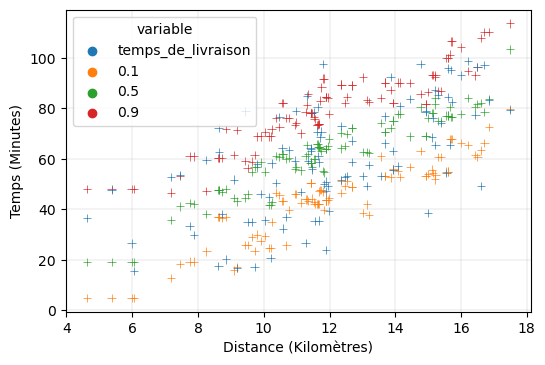

In [15]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
sns.scatterplot(data=melted_data, 
                x="distance",
                y='value',
                hue='variable',
                hue_order=['temps_de_livraison', '0.1', '0.5', '0.9'],
                marker='+')
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Temps (Minutes)")
xlabel = plt.xlabel("Distance (Kilomètres)")

#### On peux voir au final les différentes prédictions de nos quantiles 0.9 ; 0.1 ; 0.5 .